In [4]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand

In [5]:
num_of_hidden_unit = 200
batch_size = 5
epoch = 10
weights_init = 0.01
alpha = 0.01
CE_freq = 500
#print(num_of_hidden_unit)

In [6]:
#data processing
train_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[:32000,1:].values).astype('float32')
train_label = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[:32000,0].values).astype('int32')
test_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[32000:,1:].values).astype('float32')
test_label = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/train.csv")
               .iloc[32000:,0].values).astype('int32')
#test_data = (pd.read_csv("~/Developer/kaggle.Digit_Recognizer/datasets/test.csv")
#               .iloc[:,:].values).astype('float32')
print(train_data)
print(train_data.shape[0])
print(train_label)
print(train_label.shape)
print(test_data)
print(test_data.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
32000
[1 0 1 ..., 7 8 0]
(32000,)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(10000, 784)


In [7]:
#one hot encode label
num_of_labels = train_label.shape[0]
encoded_labels = np.zeros((num_of_labels, 10),
                              dtype=np.int)
for i in range(0, num_of_labels):
    encoded_labels[i][train_label[i]] = 1
train_label = encoded_labels
print(train_label)
print(train_label.shape)
# regularlize data
train_data /= 255
test_data /= 255

[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
(32000, 10)


In [8]:
#weights init
rand.seed(a=123123)
#print(rand.random())
in_to_hid_weights = np.zeros((train_data.shape[1],
                              num_of_hidden_unit),
                             dtype=np.float)
for i in range(0, in_to_hid_weights.shape[0]):
    for j in range(0, in_to_hid_weights.shape[1]):
        in_to_hid_weights[i][j] = weights_init*rand.random()
#print(in_to_hid_weights)
print(in_to_hid_weights.shape)

hid_to_out_weights = np.zeros((num_of_hidden_unit,
                              train_label.shape[1]),
                             dtype=np.float)
for i in range(0, hid_to_out_weights.shape[0]):
    for j in range(0, hid_to_out_weights.shape[1]):
        hid_to_out_weights[i][j] = weights_init*rand.random()
#print(hid_to_out_weights)
print(hid_to_out_weights.shape)

(784, 200)
(200, 10)


In [9]:
#mini batch fprop
batch_index = 0;
#while batch_index+batch_size < train_data.shape[0]:
while  batch_index == 0:
    train_batch = train_data[batch_index:
    batch_index+batch_size,:]
    train_label_batch = train_label[batch_index:
    batch_index+batch_size,:]
    # print(train_batch)
    # print(train_batch.shape)
    # print(train_label_batch)
    # print(train_label_batch.shape)
    batch_index = batch_index+batch_size

In [10]:
#fprop
hid_state = np.dot(train_batch,in_to_hid_weights)
out_state = np.dot(hid_state,hid_to_out_weights)
out_state = 1/(1+np.exp(-out_state))
#print(hid_state)
print(hid_state.shape)
print(out_state)
print(out_state.shape)

(5, 200)
[[ 0.58492692  0.58321924  0.58574199  0.58698478  0.57520467  0.58242387
   0.57797305  0.57491706  0.58137751  0.58398154]
 [ 0.71422534  0.71041035  0.71531522  0.71840126  0.69188125  0.70909573
   0.69706409  0.69178925  0.70720071  0.71206817]
 [ 0.56838805  0.56734089  0.56877659  0.56995211  0.56075497  0.56700363
   0.56232376  0.56056695  0.56612293  0.56758395]
 [ 0.577048    0.57558044  0.57709918  0.5781771   0.56825627  0.57463736
   0.56986619  0.56776827  0.5741663   0.57634502]
 [ 0.74035963  0.73651816  0.74168702  0.74502282  0.71626619  0.73518796
   0.72205546  0.71616531  0.73295239  0.73826317]]
(5, 10)


In [ ]:
#bprop:err
err = out_state-train_label_batch
print(train_label_batch)
print(err)
CE = (err*err/2).sum(axis=1)
print(CE)
print(CE.shape)

d_Out = out_state*(1-out_state)*err


print(d_Out)
print(d_Out.shape)
print(hid_to_out_weights.shape)
print(hid_state.shape)

# [[batch1_dout1, batch1_dout2, ...]
#  [batch2_dout1, batch2_dout2, ...]
#  [batch3_dout1, batch3_dout2, ...]]

# [[batch1_hid1, batch1_hid2, ...]
#  [batch2_hid1, batch2_hid2, ...]
#  [batch3_hid1, batch3_hid2, ...]]
#out
#  [[batch123_hid1*dout1, batch123_hid2*dout2, ...]
#   [batch123_hid2*dout1, batch123_hid2*dout2, ...]
#   ...                                           ]
d_hid_to_out = np.dot(hid_state.transpose(), d_Out)

#print(d_hid_to_out)
print(d_hid_to_out.shape)

#[[hid1_out1, hid1_out2, ...]
# [hid2_out1, hid2_out2, ...]
# [...                      ]]

#[[batch1_dout1, batch1_dout2, ...]
# [batch2_dout1, batch2_dout2, ...]
# [batch3_dout1, batch3_dout2, ...]]
#out
#[[batch1_hid1(out:) batch1_hid2(out:), ...]
# [batch2_hid1(out:) batch2_hid2(out:), ...]
# [...                                     ]]
d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
#print(d_hid)
print(d_hid.shape)
print(in_to_hid_weights.shape)
#[[batch1_dhid1, batch1_dhid2, ...]
# [batch2_dhid1, batch2_dhid2, ...]
# [...                            ]]

#[[batch1_in1, batch1_in2, ...]
# [batch2_in1, batch2_in2, ...]
# [...                        ]]
#out
#[[in1*dhid1(batch123, in1*dhid2(batch123, ...]
# [in2*dhid1(batch123, in2*dhid2(batch123, ...]
# [...                                        ]]

d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
print(d_in_to_hid.shape)

NameError: name 'out_state' is not defined

In [3]:
#bprop with bias
err = out_state-train_label_batch
print(train_label_batch)
print(err)
CE = (err*err/2).sum(axis=1)
print(CE)
print(CE.shape)

d_Out = out_state*(1-out_state)*err


print(d_Out)
print(d_Out.shape)
print(hid_to_out_weights.shape)
print(hid_state.shape)

# [[batch1_dout1, batch1_dout2, ...]
#  [batch2_dout1, batch2_dout2, ...]
#  [batch3_dout1, batch3_dout2, ...]]

# [[batch1_hid1, batch1_hid2, ...]
#  [batch2_hid1, batch2_hid2, ...]
#  [batch3_hid1, batch3_hid2, ...]]
#out
#  [[batch123_hid1*dout1, batch123_hid2*dout2, ...]
#   [batch123_hid2*dout1, batch123_hid2*dout2, ...]
#   ...                                           ]
d_hid_to_out = np.dot(hid_state.transpose(), d_Out)

# [[batch1_dout1, batch1_dout2, ...]
#  [batch2_dout1, batch2_dout2, ...]
#  [batch3_dout1, batch3_dout2, ...]]

#[

#print(d_hid_to_out)
print(d_hid_to_out.shape)

#[[hid1_out1, hid1_out2, ...]
# [hid2_out1, hid2_out2, ...]
# [...                      ]]

#[[batch1_dout1, batch1_dout2, ...]
# [batch2_dout1, batch2_dout2, ...]
# [batch3_dout1, batch3_dout2, ...]]
#out
#[[batch1_hid1(out:) batch1_hid2(out:), ...]
# [batch2_hid1(out:) batch2_hid2(out:), ...]
# [...                                     ]]
d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
#print(d_hid)
print(d_hid.shape)
print(in_to_hid_weights.shape)
#[[batch1_dhid1, batch1_dhid2, ...]
# [batch2_dhid1, batch2_dhid2, ...]
# [...                            ]]

#[[batch1_in1, batch1_in2, ...]
# [batch2_in2, batch2_in2, ...]
# [...                        ]]
#out
#[[in1*dhid1(batch123, in1*dhid2(batch123, ...]
# [in2*dhid1(batch123, in2*dhid2(batch123, ...]
# [...                                        ]]

d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
print(d_in_to_hid.shape)

#in
#[[batch1_hid1(out:) batch1_hid2(out:), ...]
# [batch2_hid1(out:) batch2_hid2(out:), ...]
# [...                                     ]]

#[[in1_hid1, in1_hid2, ...]
# [in2_hid1, in2_hid2, ...]
# [...                    ]]

#OUT
#[[batch1_dhid1*in1_hid1+batch1_dhid2*in1_hid2+ ..., batch1_dhid1*in2hid1+batch1_dhid2*in2hid2+...]
# [batch2_dhid1*in1_hid1+batch2_dhid2*in1_hid2+ ..., batch2_dhid1*in2hid1+batch1_dhid2*in2hid2+...]
# [...                                                                                            ]

d_in = np.dot(d_hid,in_to_hid_weights.transpose())

NameError: name 'out_state' is not defined

In [37]:
#update weights
del_hid_to_out = -1*alpha*d_hid_to_out
del_in_to_hid = -1*alpha*d_in_to_hid
print(del_hid_to_out.shape)
print(hid_to_out_weights.shape)
print(del_in_to_hid.shape)
print(in_to_hid_weights.shape)
hid_to_out_weights+=del_hid_to_out
in_to_hid_weights+=del_in_to_hid

(50, 10)
(50, 10)
(784, 50)
(784, 50)


0.1139
epoch: 0 7.8125%


0.1139
epoch: 0 15.625%


0.1139
epoch: 0 23.4375%


0.1139
epoch: 0 31.25%


0.1139
epoch: 0 39.0625%


0.1139
epoch: 0 46.875%


0.1335
epoch: 0 54.6875%


0.1316
epoch: 0 62.5%


0.1821
epoch: 0 70.3125%


0.1933
epoch: 0 78.125%


0.2511
epoch: 0 85.9375%


0.2639
epoch: 0 93.75%


0.3926
epoch: 1 7.8125%


0.415
epoch: 1 15.625%


0.4165
epoch: 1 23.4375%


0.5317
epoch: 1 31.25%


0.5348
epoch: 1 39.0625%


0.5981
epoch: 1 46.875%


0.5934
epoch: 1 54.6875%


0.6209
epoch: 1 62.5%


0.6241
epoch: 1 70.3125%


0.6775
epoch: 1 78.125%


0.6831
epoch: 1 85.9375%


0.7224
epoch: 1 93.75%


0.7423
epoch: 2 7.8125%


0.7414
epoch: 2 15.625%


0.751
epoch: 2 23.4375%


0.7615
epoch: 2 31.25%


0.7723
epoch: 2 39.0625%


0.789
epoch: 2 46.875%


0.7779
epoch: 2 54.6875%


0.7961
epoch: 2 62.5%


0.8025
epoch: 2 70.3125%


0.813
epoch: 2 78.125%


0.8269
epoch: 2 85.9375%


0.8326
epoch: 2 93.75%


0.8424
epoch: 3 7.8125%


0.8602
epoch: 3 15.625%


0.8583
epoch: 3 23.4375%


0.865
epoch: 3 31.25%


0.8693
epoch: 3 39.0625%


0.8713
epoch: 3 46.875%


0.87
epoch: 3 54.6875%


0.8735
epoch: 3 62.5%


0.8737
epoch: 3 70.3125%


0.8784
epoch: 3 78.125%


0.884
epoch: 3 85.9375%


0.8819
epoch: 3 93.75%


0.8852
epoch: 4 7.8125%


0.8861
epoch: 4 15.625%


0.8855
epoch: 4 23.4375%


0.8874
epoch: 4 31.25%


0.8884
epoch: 4 39.0625%


0.8869
epoch: 4 46.875%


0.8867
epoch: 4 54.6875%


0.8853
epoch: 4 62.5%


0.8866
epoch: 4 70.3125%


0.8894
epoch: 4 78.125%


0.8922
epoch: 4 85.9375%


0.8918
epoch: 4 93.75%


0.8946
epoch: 5 7.8125%


0.8936
epoch: 5 15.625%


0.8924
epoch: 5 23.4375%


0.8935
epoch: 5 31.25%


0.8939
epoch: 5 39.0625%


0.8925
epoch: 5 46.875%


0.8933
epoch: 5 54.6875%


0.8919
epoch: 5 62.5%


0.8925
epoch: 5 70.3125%


0.894
epoch: 5 78.125%


0.8962
epoch: 5 85.9375%


0.8963
epoch: 5 93.75%


0.8983
epoch: 6 7.8125%


0.8976
epoch: 6 15.625%


0.8962
epoch: 6 23.4375%


0.8992
epoch: 6 31.25%


0.8973
epoch: 6 39.0625%


0.8968
epoch: 6 46.875%


0.897
epoch: 6 54.6875%


0.8956
epoch: 6 62.5%


0.8969
epoch: 6 70.3125%


0.8972
epoch: 6 78.125%


0.8993
epoch: 6 85.9375%


0.8996
epoch: 6 93.75%


0.9009
epoch: 7 7.8125%


0.901
epoch: 7 15.625%


0.9
epoch: 7 23.4375%


0.9012
epoch: 7 31.25%


0.9016
epoch: 7 39.0625%


0.899
epoch: 7 46.875%


0.9015
epoch: 7 54.6875%


0.8992
epoch: 7 62.5%


0.9008
epoch: 7 70.3125%


0.9008
epoch: 7 78.125%


0.9022
epoch: 7 85.9375%


0.9021
epoch: 7 93.75%


0.9034
epoch: 8 7.8125%


0.9038
epoch: 8 15.625%


0.902
epoch: 8 23.4375%


0.9036
epoch: 8 31.25%


0.9037
epoch: 8 39.0625%


0.9015
epoch: 8 46.875%


0.9034
epoch: 8 54.6875%


0.9013
epoch: 8 62.5%


0.9041
epoch: 8 70.3125%


0.9033
epoch: 8 78.125%


0.9048
epoch: 8 85.9375%


0.9045
epoch: 8 93.75%


0.9045
epoch: 9 7.8125%


0.9052
epoch: 9 15.625%


0.9048
epoch: 9 23.4375%


0.9052
epoch: 9 31.25%


0.905
epoch: 9 39.0625%


0.9026
epoch: 9 46.875%


0.9046
epoch: 9 54.6875%


0.9028
epoch: 9 62.5%


0.9045
epoch: 9 70.3125%


0.9045
epoch: 9 78.125%


0.9065
epoch: 9 85.9375%


0.9054
epoch: 9 93.75%


train complete


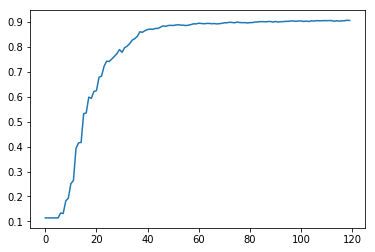

In [ ]:
###########train###############
benchmark = np.zeros(1)
#mini batch fprop
for i in range(0,epoch):
    train_No = 0;
    batch_index = 0;
    while batch_index+batch_size < train_data.shape[0]:
        train_batch = train_data[batch_index:
        batch_index+batch_size,:]
        train_label_batch = train_label[batch_index:
        batch_index+batch_size,:]
        batch_index = batch_index+batch_size
        
        #fprop
        hid_state = np.dot(train_batch,in_to_hid_weights)
        out_state = np.dot(hid_state,hid_to_out_weights)
        out_state = 1/(1+np.exp(-out_state))
        
        #bprop:err
        err = out_state-train_label_batch
        CE = (err*err/2).sum(axis=1)
        d_Out = out_state*(1-out_state)*err
        d_hid_to_out = np.dot(hid_state.transpose(), d_Out)
        d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
        d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
        
        #update weights
        del_hid_to_out = -1*alpha*d_hid_to_out
        del_in_to_hid = -1*alpha*d_in_to_hid    
        hid_to_out_weights+=del_hid_to_out
        in_to_hid_weights+=del_in_to_hid
        
        train_No += 1
        #evaluation
        
        if train_No % CE_freq == 0:
            
            hid_state = np.dot(test_data,in_to_hid_weights)
            out_state = np.dot(hid_state,hid_to_out_weights)
            out_state = 1/(1+np.exp(-out_state))
            prediction = np.argmax(out_state,axis=1)
            eval = np.abs(prediction-test_label)
            eval = np.bincount(eval)[0]/10000
            benchmark = np.append(benchmark, [eval])
            print(eval)
            #print(benchmark)
            
print('train complete')
benchmark = benchmark[1:]
Numbers = range(0,benchmark.shape[0])
plt.plot(Numbers, benchmark)
plt.show()

In [33]:
#weights init with bias
rand.seed(a=123123)
#print(rand.random())
hid_bias = np.ones((hid_state.shape[0],hid_state.shape[1]), dtype=np.float)
hid_bias *= weights_init*rand.random()
out_bias = np.ones((out_state.shape[0],out_state.shape[1]), dtype=np.float)
out_bias *= weights_init*rand.random()
in_to_hid_weights = np.zeros((train_data.shape[1],
                              num_of_hidden_unit),
                             dtype=np.float)
for i in range(0, in_to_hid_weights.shape[0]):
    for j in range(0, in_to_hid_weights.shape[1]):
        in_to_hid_weights[i][j] = weights_init*rand.random()
#print(in_to_hid_weights)
print(in_to_hid_weights.shape)

hid_to_out_weights = np.zeros((num_of_hidden_unit,
                              train_label.shape[1]),
                             dtype=np.float)
for i in range(0, hid_to_out_weights.shape[0]):
    for j in range(0, hid_to_out_weights.shape[1]):
        hid_to_out_weights[i][j] = weights_init*rand.random()
#print(hid_to_out_weights)
print(hid_to_out_weights.shape)

(784, 200)
(200, 10)


In [ ]:
###########train with bias###############
benchmark = np.zeros(1)
#mini batch fprop
for i in range(0,epoch):
    train_No = 0
    batch_index = 0
    while batch_index+batch_size < train_data.shape[0]:
        train_batch = train_data[batch_index:
        batch_index+batch_size,:]
        train_label_batch = train_label[batch_index:
        batch_index+batch_size,:]
        batch_index = batch_index+batch_size
        
        #fprop
        hid_state = np.dot(train_batch,in_to_hid_weights)
        hid_state = hid_state+hid_bias
        out_state = np.dot(hid_state,hid_to_out_weights)
        out_state = out_state+out_bias
        out_state = 1/(1+np.exp(-out_state))
        
        #bprop:err
        err = out_state-train_label_batch
        CE = (err*err/2).sum(axis=1)
        d_Out = out_state*(1-out_state)*err
        d_hid_to_out = np.dot(hid_state.transpose(), d_Out)
        d_hid = np.dot(d_Out, hid_to_out_weights.transpose())
        d_in_to_hid = np.dot(train_batch.transpose(),d_hid)
        
        #update weights
        del_hid_to_out = -1*alpha*d_hid_to_out/batch_size
        del_in_to_hid = -1*alpha*d_in_to_hid/batch_size    
        hid_to_out_weights+=del_hid_to_out
        in_to_hid_weights+=del_in_to_hid
        
        hid_bias += -1*alpha*d_hid
        out_bias += -1*alpha*d_Out
        
        train_No += 1
        #evaluation
        
        if train_No % CE_freq == 0:
            hid_state = np.dot(test_data, in_to_hid_weights)
            hid_state = hid_state+hid_bias[0]
            out_state = np.dot(hid_state, hid_to_out_weights)
            out_state = out_state + out_bias[0]
            out_state = 1 / (1 + np.exp(-out_state))
            prediction = np.argmax(out_state, axis=1)
            evaluation = np.abs(prediction - test_label)
            evaluation = np.bincount(evaluation)[0] / 10000
            benchmark = np.append(benchmark, [evaluation])
            print(evaluation)
            #print(benchmark)
            print('epoch: '+str(i)+' ' + str(train_No*batch_size / (train_data.shape[0]/100))+'%')

            
print('train complete')
benchmark = benchmark[1:]
Numbers = range(0,benchmark.shape[0])
plt.plot(Numbers, benchmark)
plt.show()

0.9004
[ 0.1139  0.1139  0.1139  0.1364  0.1139  0.1139  0.1656  0.157   0.1907
  0.1952  0.274   0.2164  0.3844  0.4164  0.3919  0.5108  0.5129  0.5821
  0.586   0.6017  0.6065  0.6505  0.6593  0.7024  0.7269  0.7272  0.7377
  0.7466  0.7573  0.7627  0.762   0.7681  0.7772  0.7893  0.7974  0.8061
  0.8137  0.8371  0.8341  0.8439  0.8517  0.8595  0.8509  0.8668  0.8646
  0.8692  0.8779  0.8763  0.8789  0.8833  0.8799  0.8849  0.8842  0.8828
  0.8813  0.8829  0.8829  0.8865  0.8893  0.8892  0.8892  0.8909  0.8887
  0.8906  0.8911  0.8885  0.8877  0.8884  0.8897  0.8919  0.8952  0.8941
  0.896   0.8943  0.8934  0.8931  0.8937  0.8924  0.8917  0.8914  0.8938
  0.8954  0.8964  0.8957  0.8984  0.897   0.8957  0.8965  0.8969  0.8944
  0.895   0.8938  0.8971  0.8963  0.899   0.8982  0.8998  0.8978  0.8983
  0.8992  0.8991  0.8951  0.8973  0.8972  0.8984  0.8986  0.899   0.9003
  0.9018  0.8993  0.8998  0.9006  0.8995  0.8963  0.8981  0.8985  0.8998
  0.8997  0.9002  0.9004]


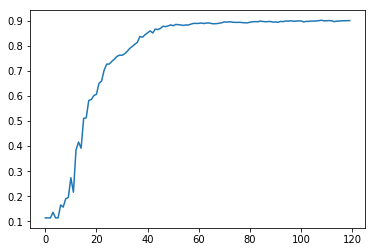

In [25]:
# evaluation

# hid_state = np.dot(test_data,in_to_hid_weights)
# out_state = np.dot(hid_state,hid_to_out_weights)
# out_state = 1/(1+np.exp(-out_state))
# #print(out_state)
# prediction = np.argmax(out_state,axis=1)


# print(prediction)
# print(prediction.shape)
# print(test_label)
# print(test_label.shape)

eval = np.abs(prediction-test_label) 
eval = np.bincount(eval)[0]/10000
print(eval)
print(benchmark)
No = range(0,benchmark.shape[0])
plt.plot(No, benchmark)
plt.show()

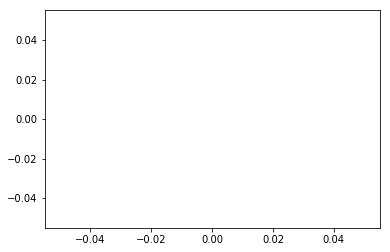

In [10]:
#plot
benchmark = benchmark[50:]
Numbers = range(0,benchmark.shape[0])
plt.plot(Numbers, benchmark)
plt.show()